In [1]:
import pandas
import numpy as np
df = pandas.read_sas('/home/roger/Datasets/LLCP2020.XPT')

/usr/local/lib/python3.8/dist-packages/pandas/io/sas/sas_xport.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = v


In [ ]:
#df2 = df[np.logical_and(df.SEXVAR in [1,2], )]

In [ ]:
#cols = list(df.columns)

In [ ]:
#for col in cols:
#    if 'AGE' in col or 'WEIGHT' in col:
#        print(col)

In [ ]:
print(df.shape, df2.shape)

In [5]:
df2 = df.query('SEXVAR.isin([1,2]) & WEIGHT2 < 776 & HTIN4 >= 36 & HTIN4 <= 95 & _AGE_G >= 1 & _AGE_G <= 6 & GENHLTH >=1 &GENHLTH<=5 & INCOME2')

In [85]:
print(df.shape, df2.shape)

(401958, 279) (359460, 279)


In [6]:
df3 = pandas.DataFrame()


In [12]:
ailmentMap = {1:'yes',2:'no',3:'unknown',7:'unknown', 9:'unknown','': 'no'}
diabetesMap = {1:'yes', 2:'no', 3:'no', 4:'no', 7:'no', 9:'no'}
maritalMap = {1:'married',2:'divorced',3:'widowed',4:'separated',5:'nevermarried', 6:'unmarriedcouple',9:'unknown'}
maritalSummary = {1:'yes',2:'no',3:'no', 4:'yes', 5:'no', 6:'no', 9:'unknown'}
educationMap = {1:'6-none', 2:'5-elementary', 3:'4-somehs', 4:'3-hs',5:'2-somecollege',6:'1-college', 9:'7-unknown'}
veteranMap = {1:'yes',2:'no', 7:'unknown', 9:'unknown'}
stateMap = {1:'AZ', 2:'AK', 4:'AZ',5:'AR',6:'CA', 8:'CO', 9:'CT',10:'DE',11:'DC',12:'FL',13:'GA',
           15:'HI',16:'ID',17:'IL',18:'IN',19:'IA',20:'KS', 21:'KY',22:'LA',23:'ME', 24:'MD', 25:'MA',26:'MI',
           27:'MN',28:'MS', 29:'MO', 30:'MT', 31:'NE',32:'NV', 33:'NH', 34:'NJ', 35:'NM',36:'NY', 37:'NC',
           38:'ND', 39:'OH',40:'OK',41:'OR', 42:'PA',44:'RI',45:'SC', 46:'SD', 47:'TN', 48:'TX', 49:'UT',
           50:'VT', 51:'VA', 53:'WA', 54:'WV',55:'WI', 56:'WY', 66:'Guam', 72:'PR'}
df3['age'] = df2['_AGE80']
df3['gender'] = df2['SEXVAR'].map({1:'male',2:'female'})
df3['weight'] = df2['WEIGHT2']
df3['height'] = df2['HTIN4']
df3['ageGroup'] = df2['_AGE_G']
df3['genhealth'] = df2['GENHLTH'].map({1:'1-excellent',2:'2-verygood',3:'3-good',4:'4-fair',5:'5-poor'})
df3['asthma_ever'] = df2['ASTHMA3'].map(ailmentMap)
df3['asthma'] = df2['ASTHNOW'].map(ailmentMap)
df3['skincancer'] = df2['CHCSCNCR'].map(ailmentMap)
df3['othercancer'] = df2['CHCOCNCR'].map(ailmentMap)
df3['copd'] = df2['CHCCOPD2'].map(ailmentMap)
df3['arthritis'] = df2['HAVARTH4'].map(ailmentMap)
df3['depression'] = df2['ADDEPEV3'].map(ailmentMap)
df3['kidneydis'] = df2['CHCKDNY2'].map(ailmentMap)
df3['diabetes'] = df2['DIABETE4'].map(diabetesMap)
df3['maritaldetail'] = df2['MARITAL'].map(maritalMap)
df3['married'] = df2['MARITAL'].map(maritalSummary)
df3['education'] = df2['EDUCA'].map(educationMap)
df3['veteran'] = df2['VETERAN3'].map(ailmentMap)
df3['income'] = df2['INCOME2']
df3['state'] = df2['_STATE'].map(stateMap)

In [97]:
df3.describe()

,age,weight,height,ageGroup,income
count,359460.000000,359460.000000,359460.000000,359460.000000,359460.000000
mean,54.581472,181.787025,67.072790,4.359281,19.330326
std,17.764701,46.315380,4.198069,1.621580,30.745848
min,18.000000,50.000000,36.000000,1.000000,1.000000
25%,40.000000,150.000000,64.000000,3.000000,5.000000
50%,57.000000,175.000000,67.000000,5.000000,7.000000
75%,69.000000,205.000000,70.000000,6.000000,8.000000
max,80.000000,758.000000,94.000000,6.000000,99.000000


In [98]:
df3.columns


Index(['age', 'gender', 'weight', 'height', 'ageGroup', 'genhealth',
       'asthma_ever', 'skincancer', 'othercancer', 'copd', 'arthritis',
       'depression', 'kidneydis', 'diabetes', 'maritaldetail', 'married',
       'education', 'veteran', 'income', 'state'],
      dtype='object')

In [99]:
df3.genhealth.describe()


count       359460
unique           5
top       verygood
freq        125114
Name: genhealth, dtype: object

In [13]:
df3.to_csv('/home/roger/Datasets/llcp.csv', index=False)

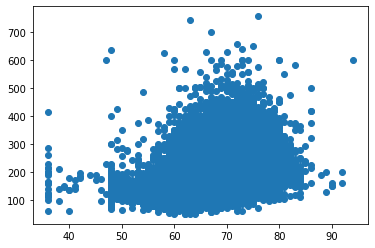

In [94]:
import matplotlib.pyplot as plt
plt.scatter(df3.height, df3.weight)